- we understood the basic dataframe

- we perform the categorical data analysis

    - frequency table

    - relative frequency table

    - bar chart

    - piechart

- we perform the numerical analysis

  - statistical measures

  - emerical rule 

  - histogram

  - box plot


- outlier analysis

  - treat the outliers


- scatter plots 

  - Heat map

- Encode : convert cat to numerical

  - map

  - LabelEncoder

  - OneHotEncoder

  - np.where 

**Standardization**

- Standardization also called as Z-score

- Z-score values ranges from -3 to 3


<img class="XqHOTb IGEbUc" alt="Z = \frac{x - \mu}{\sigma}" src="https://www.gstatic.com/education/formulas2/553212783/en/z_score.svg" role="img" data-csiid="BfqQZ8eCBbzG4-EPsrLnkQ8_14" data-atf="0">

In [1]:
# Read the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path=r"C:\Users\omkar\OneDrive\Documents\Data science\Naresh IT\Naresh IT\Datafiles\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

cat_cols=visa_df.select_dtypes(include='object').columns
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols,cat_cols

(Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'),
 Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'))

In [ ]:
# step-1: take the prevailaing wage column
# step-2: mean of wage
# step-3: sd of wage
# step-4: step1-step2
# step-5: step4/step3

In [3]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_sd=wage_data.std()
NR=wage_data-wage_mean
data1=NR/wage_sd
visa_df['prevailing_wage_z']=data1

In [4]:
visa_df[['prevailing_wage','prevailing_wage_z']]

,prevailing_wage,prevailing_wage_z
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


**StandardScalar**

- sklearn

  - preprocessing

    - StanadrdScalar

**Note**

- StanadardScalar takes input as DataFrame not series

In [8]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(visa_df[['prevailing_wage']])

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(visa_df['prevailing_wage'])

ValueError: Expected 2D array, got 1D array instead:
array=[   592.2029  83425.65   122996.86   ... 146298.85    86154.77
  70876.91  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
wage_data_reshaped=visa_df['prevailing_wage'].values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(wage_data_reshaped)

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

**Check point-1**

**idxmax and idxmin**

In [14]:
visa_df['prevailing_wage'].idxmax()==visa_df['prevailing_wage_z'].idxmax()

True

In [15]:
visa_df['prevailing_wage'].idxmin()==visa_df['prevailing_wage_z'].idxmin()

True

In [17]:
max_id=visa_df['prevailing_wage'].idxmax()
min_id=visa_df['prevailing_wage'].idxmin()
visa_df.iloc[[max_id,min_id]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.2700,Year,Y,Denied,4.634102
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified,-1.409682


**check-point-2**

- we developed the code intwo ways

- from scracth and using pacakge

In [18]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_sd=wage_data.std()
NR=wage_data-wage_mean
data1=NR/wage_sd
visa_df['prevailing_wage_z']=data1
################################################
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
visa_df['prevailing_wage_SS']=sc.fit_transform(visa_df[['prevailing_wage']])

visa_df[['prevailing_wage_z','prevailing_wage_SS']]

,prevailing_wage_z,prevailing_wage_SS
0,-1.398510,-1.398537
1,0.169832,0.169835
2,0.919060,0.919079
3,0.169991,0.169994
4,1.428576,1.428604
...,...,...
25475,0.049923,0.049924
25476,3.876083,3.876159
25477,1.360253,1.360280
25478,0.221504,0.221509


**Normalization**

- Normaliztion also called as **MinMaxScalar**

- The values ranges from 0 to 1

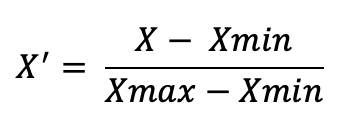

In [ ]:
# step-1: read the prewailaing wage data
# step-2: calculate wage min
# step-3: calculate wage max data
# step-4: Nr=step1-step2
# step-5: Dr= Step3-step2
# step-6: Nr/Dr

#######################################
sklearn  preprocessing MinMaxScalar

In [20]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
wage_mms=mms.fit_transform(visa_df[['prevailing_wage']])

In [21]:
wage_mms.max()

0.9999999999999999

In [22]:
wage_mms.min()

0.0